# Notebook 1: Exploratory Analysis

In this notebook we look at some summary statistics for the various features of this dataset and also the distributions of these features for each class label.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import time
import os
import pyarrow
import gc

# Plotting
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

# display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#pd.set_option('float_format', '{:f}'.format)

# Load Data

This function loads the original data from the `~/data` folder. If the original data doesn't exist it downloads it from the UCI repository and saves at `~/data/original.feather`.

In [2]:
def get_data():
    try:
        #
        original = pd.read_feather('../data/original.feather')
    except:
        # Get Original Data
        original = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz', header = None)

        # Fix columns
        original.columns = ['Elevation', 'Aspect', 'Slope',
               'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
               'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
               'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
               'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
               'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
               'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
               'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
               'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
               'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
               'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
               'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
               'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
               'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
               'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40',
               'Cover_Type']

        for col, dtype in original.dtypes.iteritems():
            if dtype.name.startswith('int'):
                original[col] = pd.to_numeric(original[col], downcast ='integer')
            elif dtype.name.startswith('float'):
                original[col] = pd.to_numeric(original[col], downcast ='float')
        
        if not os.path.isdir('../data'):
            os.mkdir('../data')
        original.to_feather('../data/original.feather')
    return original

In [3]:
%%time
original = get_data()

# Get feature columns
features = [x for x in original.columns if x not in ['Id','Cover_Type']]
wilderness_cols = [x for x in features if x.startswith('Wild')]
soil_cols = [x for x in features if x.startswith('Soil')]
binary_cols = [x for x in features if x.startswith('Soil') or x in wilderness_cols]
numerical_cols = [x for x in features if x not in binary_cols]

Wall time: 33 ms


# Numerical Features

In [4]:
def check_numerical(data):
    temp = data[numerical_cols].describe().T.drop(columns = 'count')
    temp[['std']] = temp[['std']].round(1)
    temp[['mean','min','25%','50%','75%','max']] = temp[['mean','min','25%','50%','75%','max']].astype('int32')
    return temp

In [5]:
def plot_numerical_original(feature):
    # plot the bimodal features 
    plt.figure()
    plt.subplots(2, 3, figsize=(16, 10))
    for i, label in enumerate([1,2,3,4,5,6], start = 1):
        plt.subplot(2, 3, i)
        plt.gca().set_aspect('auto')
        sns.histplot(original[original.Cover_Type == label][feature], color="blue", kde=True, stat = 'density', bins=50, label=f'cover type {label}')
        plt.xlabel(feature, fontsize=12); plt.legend()
    plt.show()

In [6]:
# Original
check_numerical(original)

,mean,std,min,25%,50%,75%,max
Elevation,2959,280.0,1859,2809,2996,3163,3858
Aspect,155,111.9,0,58,127,260,360
Slope,14,7.5,0,9,13,18,66
Horizontal_Distance_To_Hydrology,269,212.5,0,108,218,384,1397
Vertical_Distance_To_Hydrology,46,58.3,-173,7,30,69,601
Horizontal_Distance_To_Roadways,2350,1559.3,0,1106,1997,3328,7117
Hillshade_9am,212,26.8,0,198,218,231,254
Hillshade_Noon,223,19.8,0,213,226,237,254
Hillshade_3pm,142,38.3,0,119,143,168,254
Horizontal_Distance_To_Fire_Points,1980,1324.2,0,1024,1710,2550,7173


# Elevation

<Figure size 432x288 with 0 Axes>

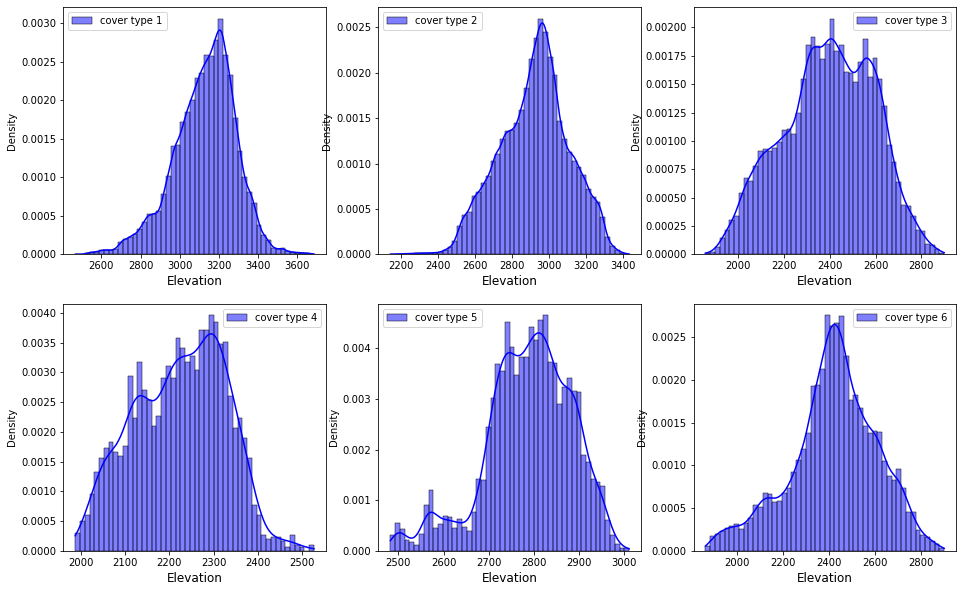

In [7]:
plot_numerical_original('Elevation')

# Aspect

<Figure size 432x288 with 0 Axes>

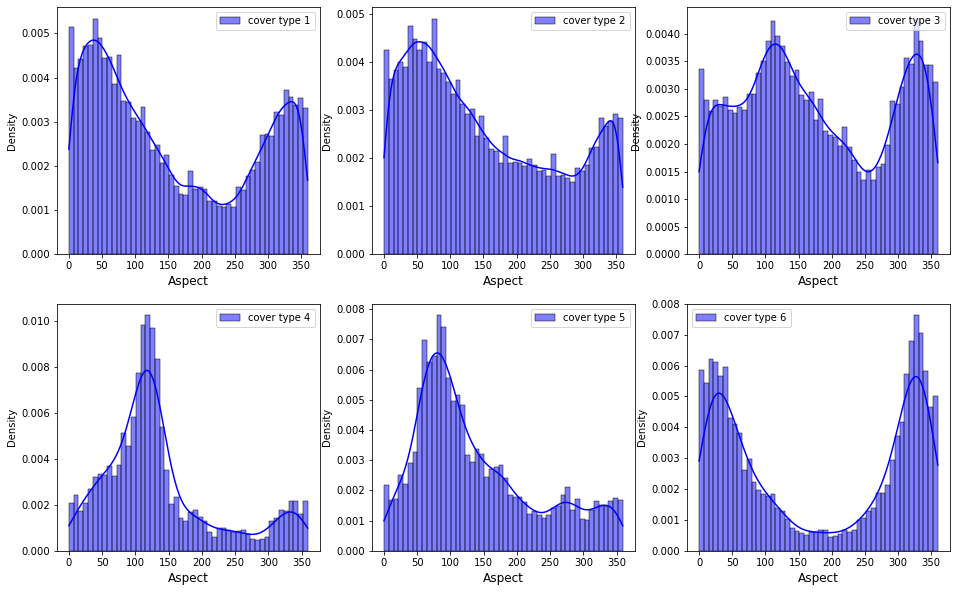

In [8]:
plot_numerical_original('Aspect')

# Slope

<Figure size 432x288 with 0 Axes>

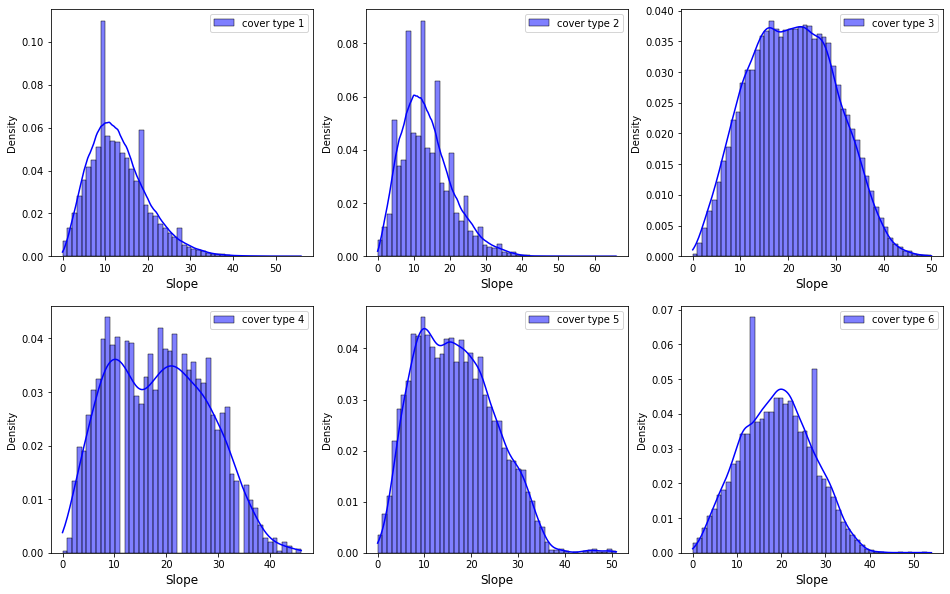

In [9]:
plot_numerical_original('Slope')

# Hydrology

<Figure size 432x288 with 0 Axes>

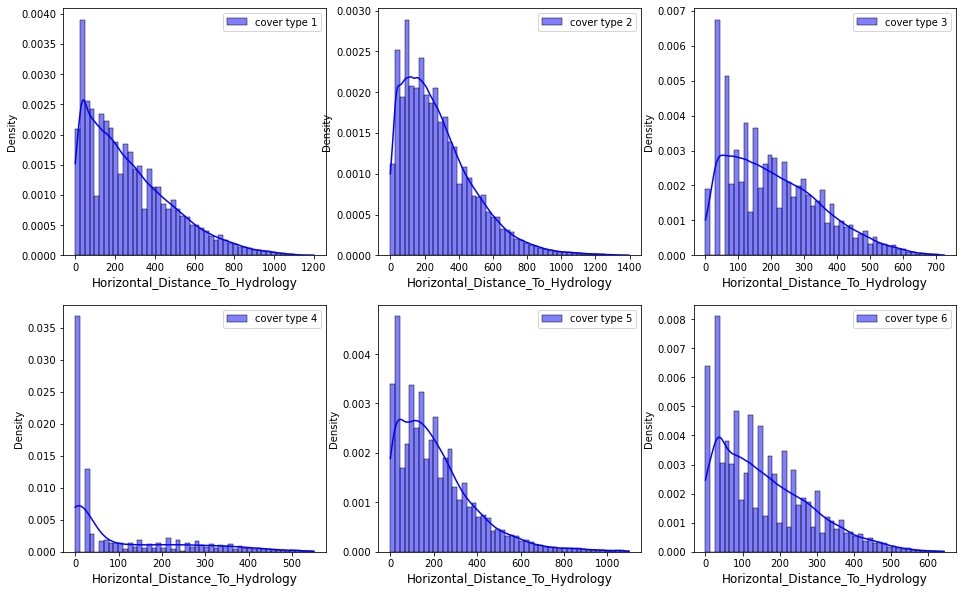

In [10]:
plot_numerical_original('Horizontal_Distance_To_Hydrology')

<Figure size 432x288 with 0 Axes>

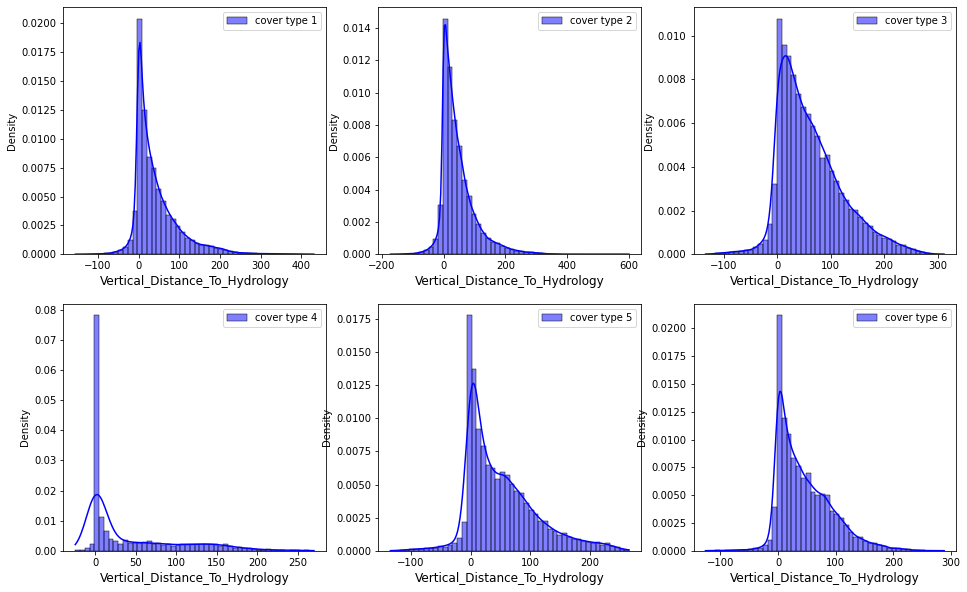

In [11]:
plot_numerical_original('Vertical_Distance_To_Hydrology')

# Roadways

<Figure size 432x288 with 0 Axes>

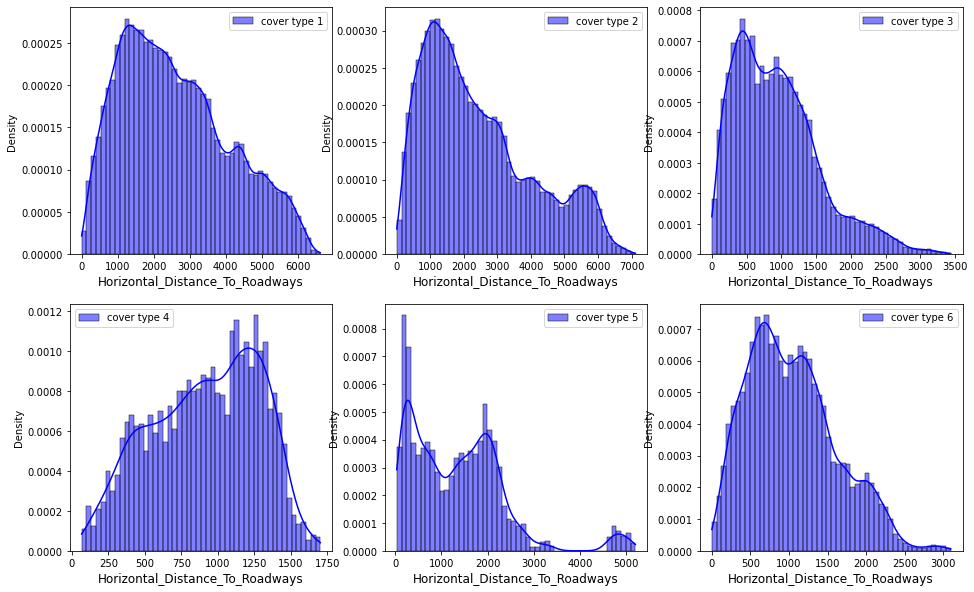

In [12]:
plot_numerical_original('Horizontal_Distance_To_Roadways')

# Hillshade

<Figure size 432x288 with 0 Axes>

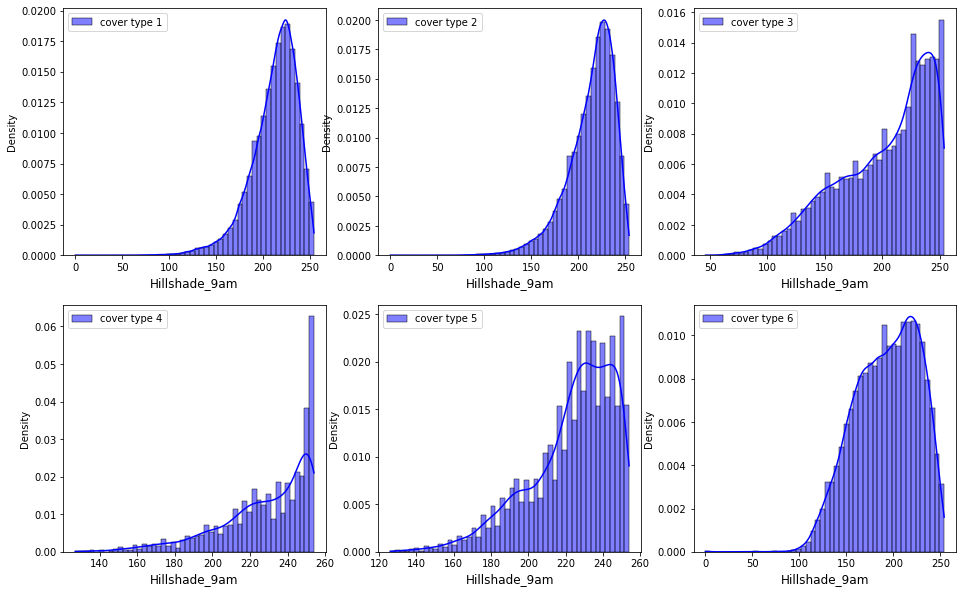

In [13]:
plot_numerical_original('Hillshade_9am')

<Figure size 432x288 with 0 Axes>

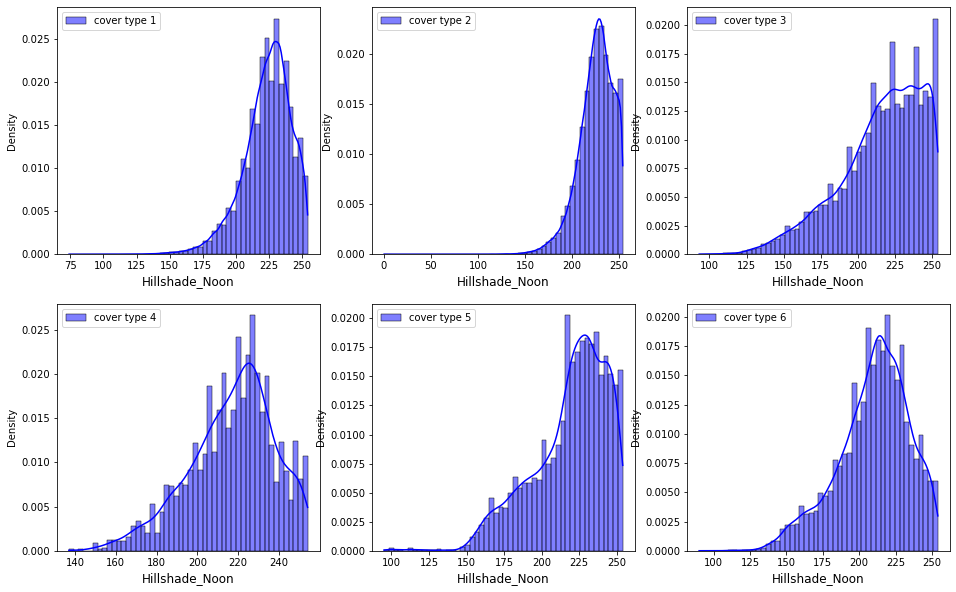

In [14]:
plot_numerical_original('Hillshade_Noon')

<Figure size 432x288 with 0 Axes>

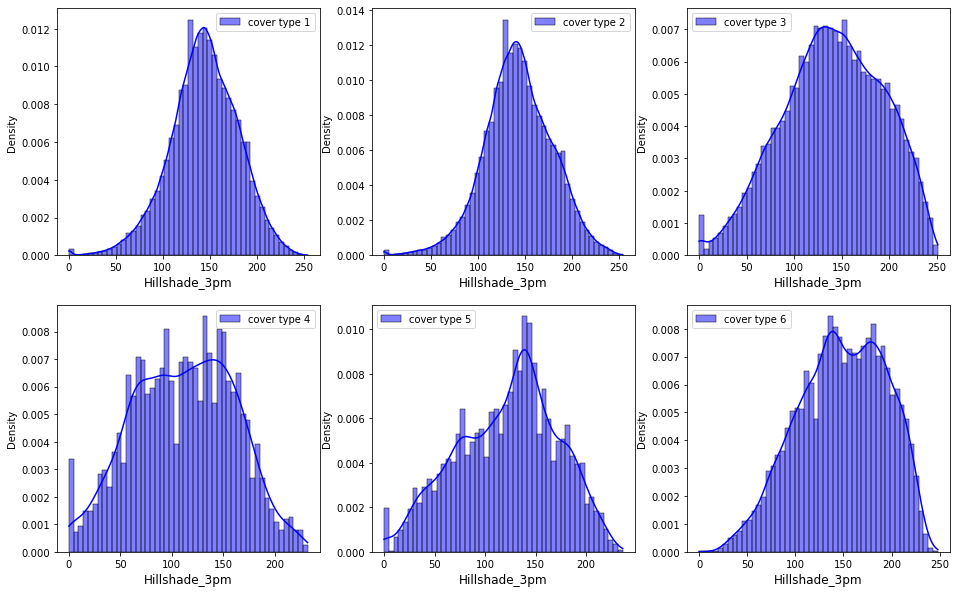

In [15]:
plot_numerical_original('Hillshade_3pm')

# Fire Points

<Figure size 432x288 with 0 Axes>

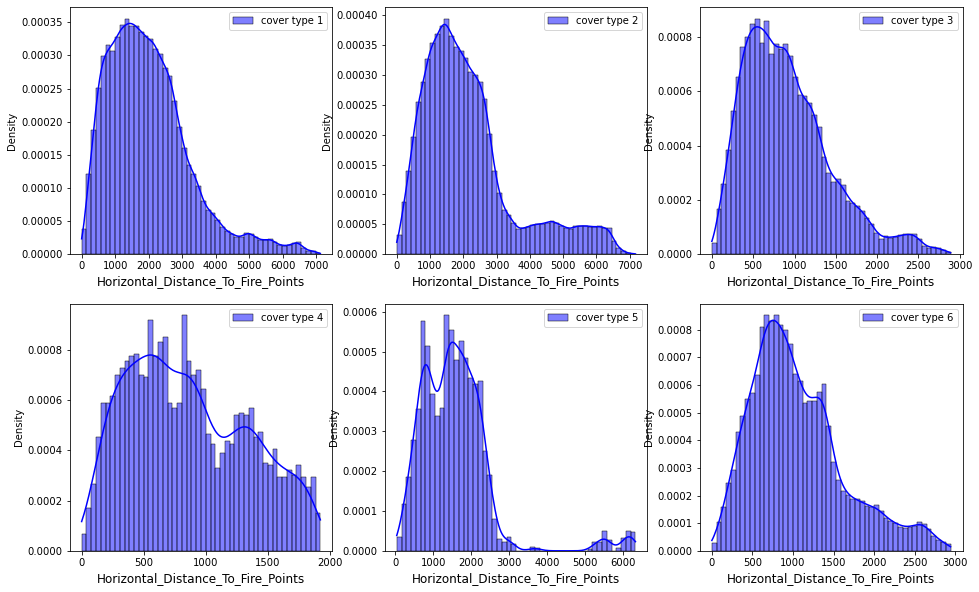

In [16]:
plot_numerical_original('Horizontal_Distance_To_Fire_Points')

# Categorical Data

The original data consists of two one-hot encoded categorical variables:

* Wilderness Area (4 columns)
* Soil Type (40 columns)

We could recombine these binary columns into a pair of columns with 4 and 40 levels respectively. This might help gradient boosting algorithms which prefer label encoded categorical variables.

In [17]:
def counts_per_column(data, columns):
    temp = data[columns].sum(axis = 0)
    temp = pd.DataFrame(data = temp.round(2))
    temp.columns = ['Total']
    for i in sorted(set(data['Cover_Type'])):
        temp[f'Covertype_{i}'] = data[columns][data.Cover_Type == i].sum(axis = 0)
    return temp

# Wilderness Area

In [18]:
counts_per_column(original, wilderness_cols)

,Total,Covertype_1,Covertype_2,Covertype_3,Covertype_4,Covertype_5,Covertype_6,Covertype_7
Wilderness_Area1,260796,105717,146197,0,0,3781,0,5101
Wilderness_Area2,29884,18595,8985,0,0,0,0,2304
Wilderness_Area3,253364,87528,125093,14300,0,5712,7626,13105
Wilderness_Area4,36968,0,3026,21454,2747,0,9741,0


# Soil Type

In [19]:
counts_per_column(original, soil_cols)

,Total,Covertype_1,Covertype_2,Covertype_3,Covertype_4,Covertype_5,Covertype_6,Covertype_7
Soil_Type1,3031,0,0,2101,178,0,752,0
Soil_Type2,7525,0,852,4991,115,264,1303,0
Soil_Type3,4823,0,1191,2411,1018,0,203,0
Soil_Type4,12396,182,3251,7501,168,585,631,78
Soil_Type5,1597,0,0,967,48,0,582,0
Soil_Type6,6575,0,912,3993,320,0,1350,0
Soil_Type7,105,0,105,0,0,0,0,0
Soil_Type8,179,43,136,0,0,0,0,0
Soil_Type9,1147,161,986,0,0,0,0,0
Soil_Type10,32634,956,10803,11532,224,260,8859,0
